In [14]:
using Graphs, IndexedGraphs, Statistics
using MatrixProductBP, MatrixProductBP.Models
using Plots, LaTeXStrings
using Measurements
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [185]:
T = 400        # final time
k = 3         # degree
Δt = 1.0       # discretization
λ = 0.07      # rate of transmission
ρ = 0.1       # rate of recovery
γ = 0.5      # prob. of zero patient
N = 10^3;

In [186]:
seed = 0
gg = random_regular_graph(N, k; seed)
g = IndexedGraph(gg)

# adjust probabilities and number of discrete time steps to simulate continuous-time behavior
sis = SIS(g, λ*Δt, ρ*Δt, floor(Int, T/Δt); γ)

# set up MPBP computation
bp = mpbp(sis)
sms = SoftMarginSampler(bp);

In [187]:
nsamples = 10^3
sample!(sms, nsamples);

In [188]:
p = mean([x.val for x in y] for y in means((x, args...)->x-1, sms));

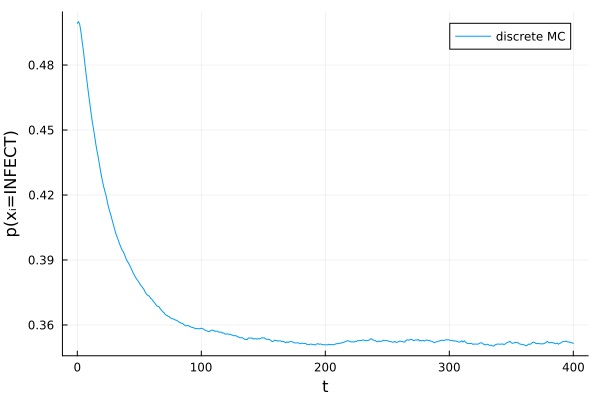

In [189]:
pl = plot(0:Δt:T, p, xlabel="t", ylabel="p(xᵢ=INFECT)", label="discrete MC")

In [190]:
p_ss = mean(m[end-100:end])

0.3435395528052805

## Gillespie

In [181]:
Δtplot = 1e-1
p_gill,_ = continuous_sis_sampler(sis, T, λ, ρ; nsamples = 10^3, sites=1:N,
    Δt=Δtplot, discard_dead_epidemics=false)
m_gill = mean(p_gill);

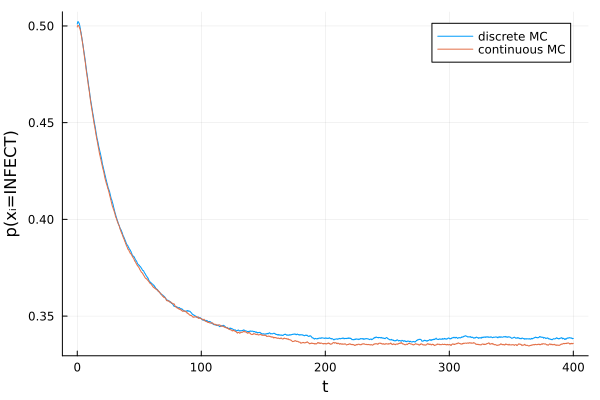

In [182]:
plot!(deepcopy(pl), 0:Δtplot:T, m_gill, label="continuous MC")

In [184]:
p_ss_cont = mean(m_gill[end-100:end])

0.335803762376238